In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

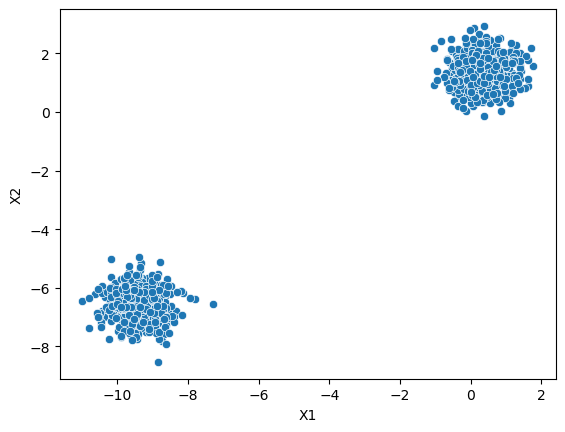

In [3]:
sns.scatterplot(data=two_blobs, x = 'X1', y = 'X2')

<Axes: xlabel='X1', ylabel='X2'>

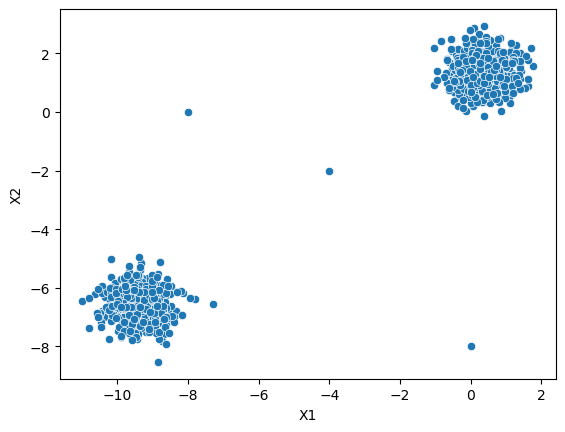

In [4]:
sns.scatterplot(data=two_blobs_outliers, x = 'X1', y = 'X2')

In [5]:
def display_category(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1',y='X2', hue = labels, palette='Set1')

In [6]:
from sklearn.cluster import DBSCAN

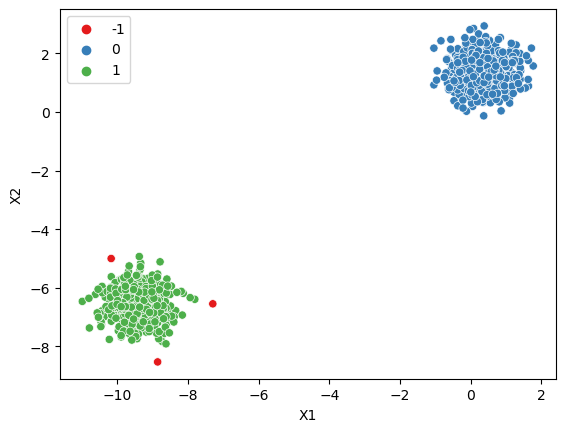

In [7]:
dbscan = DBSCAN()
display_category(dbscan,two_blobs)

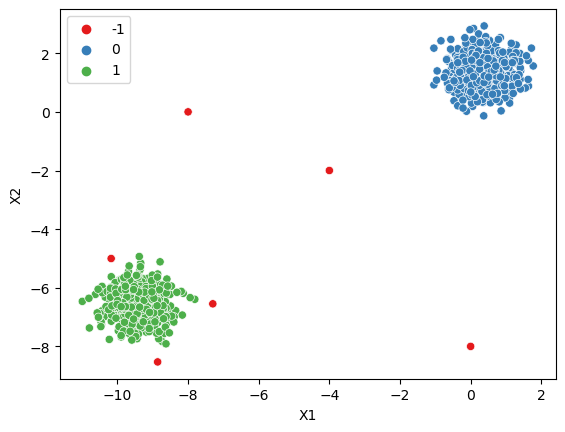

In [8]:
display_category(dbscan,two_blobs_outliers)

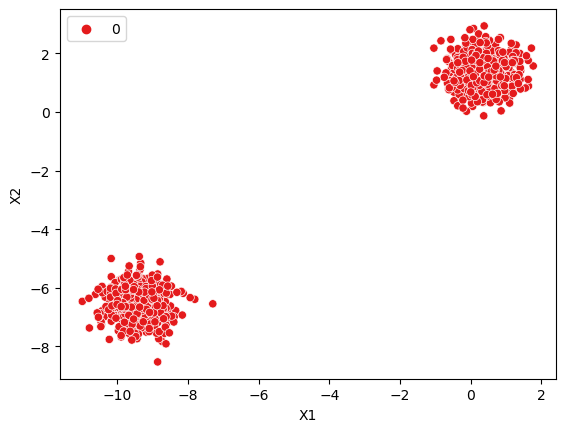

In [10]:
dbscan = DBSCAN(eps= 1000)
display_category(dbscan,two_blobs)

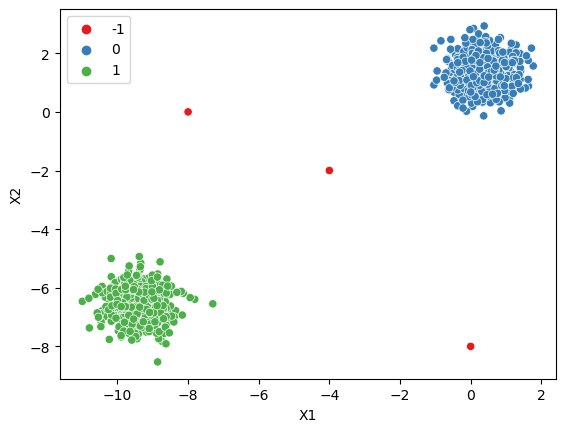

In [12]:
dbscan = DBSCAN(eps= 1)
display_category(dbscan,two_blobs_outliers)

In [13]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [16]:
two_blobs_outliers[dbscan.labels_== -1]

,X1,X2
1000,-4.0,-2.0
1001,0.0,-8.0
1002,-8.0,0.0


In [17]:
np.sum(dbscan.labels_== -1)

3

In [18]:
np.sum(dbscan.labels_== -1)*100/len(dbscan.labels_)

0.29910269192422734

###### Charting Eps value

In [20]:
#np.linspace(.001,10,100)

In [21]:
outlier_percent = []
no_of_outliers = []

for e in np.linspace(.001,10,100):
    
    dbscan = DBSCAN(eps= e)
    dbscan.fit(two_blobs_outliers)
    
    no_of_outliers.append(np.sum(dbscan.labels_== -1))
    
    outlier_percent.append(np.sum(dbscan.labels_== -1)*100/len(dbscan.labels_))

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 20.0)

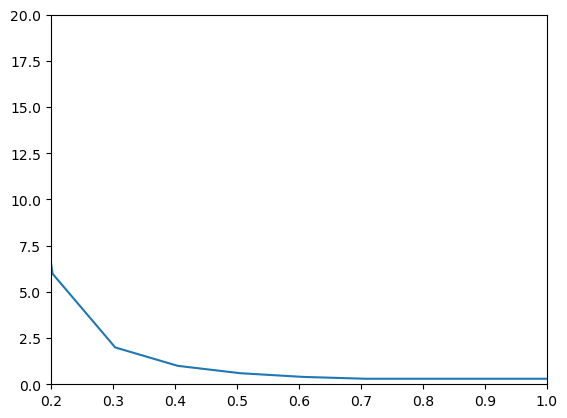

In [26]:
sns.lineplot(x = np.linspace(.001,10,100), y = outlier_percent)
plt.xlim(0.2,1)
plt.ylim(0,20)

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(2.0, 4.0)

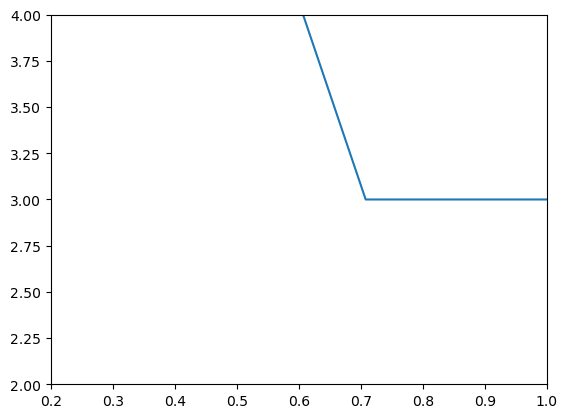

In [30]:
sns.lineplot(x = np.linspace(.001,10,100), y = no_of_outliers)
plt.xlim(0.2,1)
plt.ylim(2,4)

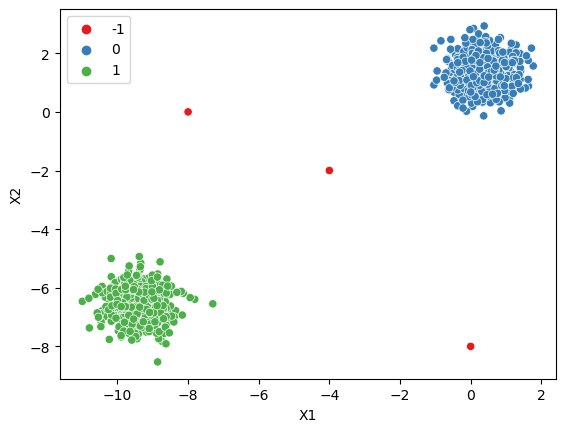

In [31]:
dbscan = DBSCAN(eps = 0.75)
display_category(dbscan,two_blobs_outliers)

###### Min Samples

* recommended min_samples = 2* number of dimensions/features/columns

In [32]:
outlier_percent = []

for n in np.arange(1,100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    outlier_percent.append(np.sum(dbscan.labels_== -1)*100/len(dbscan.labels_))

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

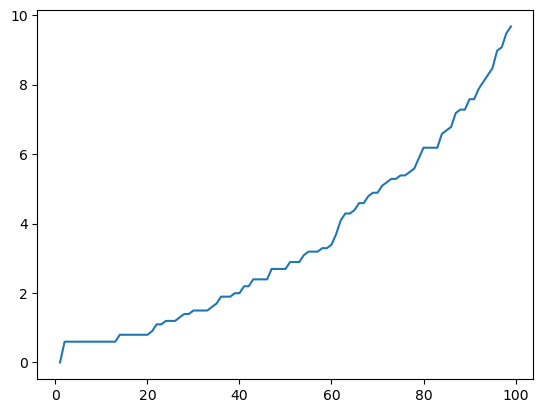

In [33]:
sns.lineplot(x = np.arange(1,100), y = outlier_percent)

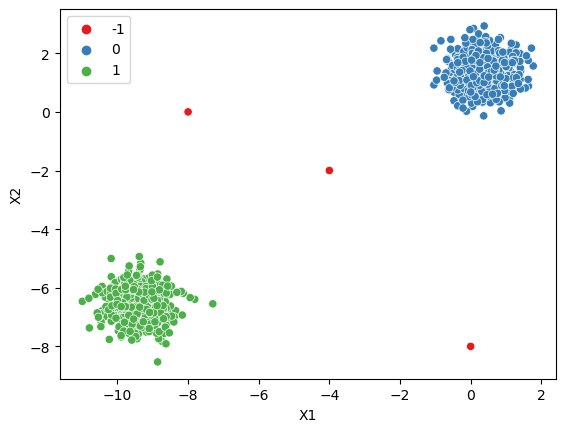

In [37]:
no_of_dim = two_blobs_outliers.shape[1]

dbscan  = DBSCAN(eps = 0.75, min_samples=2*no_of_dim)
display_category(dbscan, two_blobs_outliers)

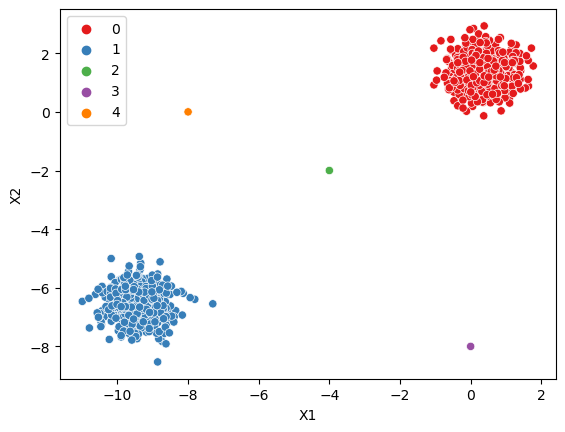

In [39]:
dbscan  = DBSCAN(eps = 0.75, min_samples=1)
display_category(dbscan,two_blobs_outliers)